# CIMAP Algorithm Application Example
 
 In this tutorial we are going to make an example of application of CIMAP algorithm to some data.
 The Data is stored in the folder \example_data under the name "Dataset.csv". The data is an example of the data that can be used with CIMAP.
 
 First be sure you have installed the CIMAP using ```pip install CIMAP``` command.


In [1]:
# import of the library
from CIMAP import CIMAP
# To simply run the algorithm without making all the steps is possible to use the method CIMAP.Run(). This method allows the user to choose the input data file and run all the methods at once.

### Application of the Algorithm
The first step of the algorithm is loading the data using the *Input* method, in this case we set the path of the input_file, otherwise a window that allows manual selection is opened. Then the identification of the activation intervals edges is performed to transform them into percentage values of the cycle performed by the *Intervals* method. The *Intervals* is never explicitly used but is a fundamental part of most of the methods that are called. The second method that is applied is the *RemoveAddints* method. It performs cleaning on the data removing two elements. The first element removed are those gaps or activation intervals in the cycles that are shorter than 3% of the gait cycles. This value is defined as biomechanocally non relevant activation for motion puropose. The second element removed are those cycle that present a monotone behavior over the whole duration of the cycle (i.e., the cycle is always active or there is no activation over the cycle).

In [2]:
input_file = ".\\example_data\\Dataset.csv"
# Reading of the input_file and creation of the utility dictionaries s and muscles
s,muscles = CIMAP.Input(input_file = input_file)
# Removal of the small intervals/gaps and the always-on/off cycles
s = CIMAP.RemoveAddints(s)

Then the cycles are divied by modality, i.e. the number of activation intervals whithin a cycle identify the modality (e.g., a cycles with n activation intervals is a n-modality cycle) to have higher homogeneity in the elaboration (*ModalityDivision* method).
After the division in modalities the clustering is performed on each modality separately, only on the modalities that present a sufficient number of cycles (*Dendrograms* Method). The threshold Th on the minimum number of cycles per modality to perform clustering is set to Th = 10, as it was recently to showed to not influence significantly the results and allows the application to low number of cycles acquisitions (Dotti et al.). For each modality two dendrograms, one for each possible distance metric that are used, are built using the “complete” method (i.e., using the farthest distance between every pair of elements). Two distance metrics are used (Manhattan and Chebyshev) because during the optimization process was demostrated that neither perfomed significantly better than the other.

In [3]:
# Division of the cycles by modality
muscles = CIMAP.ModalityDivision(s,muscles)
# Construction of the Dendrograms
muscles = CIMAP.Dendrograms(muscles)

After the construction of the dendrograms the optimal number of cluster must be chosen. This is performed by the "Cuts" method.
This method uses the "FindCuts" function to choose automatically the optimal cutting points using three different criteria evaluating the difference in distance of the merged clusters considering the difference of inter-cluster distance between consecutive iterations. Of the three so created cutoff points the best one is identified by finding the one that shows the best compromise between low intra-cluster variability and a high number of cycles included in the significant clusters (clusters with more than one element). After the choice of the best cutoff, the best clustering obtain from the two distance metrics is identified. The distance metrics is chosen as the one the shows the lowest mean similarity between the centroid and the cluster elements.
Then the "Ouput" is applied to distribute the results of the clustering between the sides if the data given as input was bilateral and reordered in a structure that identifies the non significant and the significant clusters divided by modality.

In [4]:
# Identification of the best distance and cutting point of the dendrograms
muscles = CIMAP.Cuts(muscles)
# Distribution and reordering of the results
cimap_out = CIMAP.Output(s,muscles)

The results from clustering can be elaborated for the extraction of the principal activations using the "PAsExtraction" method. First, the significant clusters are identified as those clusters that contain more than 10% of the total number of cycles that were considered as significant in the previous elaboration. Subsequently the principal activations are extracted as the intersection of the activation intervals of the prototypes from the significant clusters.

In [5]:
# Extraction of the Principal Activations
cimap_pas = CIMAP.PAsExtraction(cimap_out)

#### Graphical functions
The *targetgraph* method is used to select only what to show graphically. To change it modify the Target as input to the function with one of the following options: "TA", "LGS", "RF", "LH", "GMD".
The first function used is *actplot* that shows all the activation profiles stored in the starting structure in the temporal sequence that they are given.

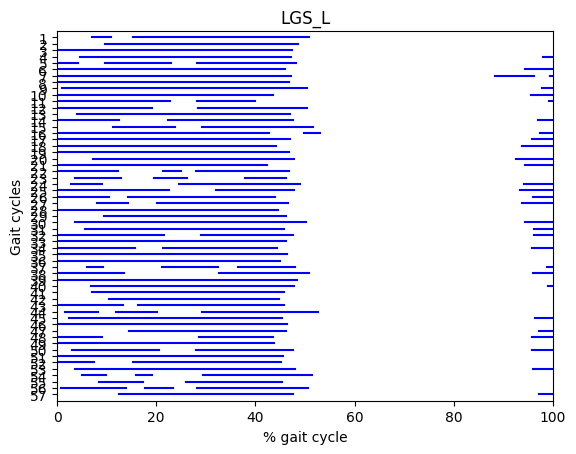

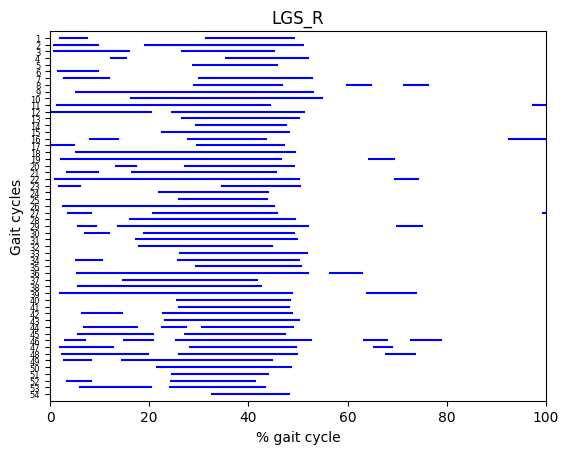

In [6]:
# Graph of the activation profiles of the cycles

plotting = CIMAP.targetgraph(s,Target = "LGS")
CIMAP.actplot(plotting)

The method *modality_distribution* is used to show the distribution of the cycles over the modalities.

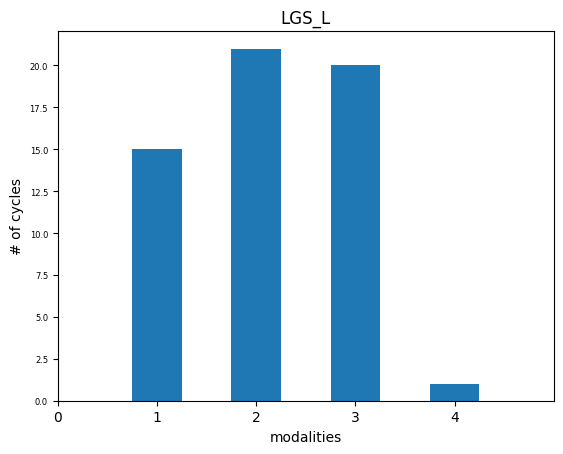

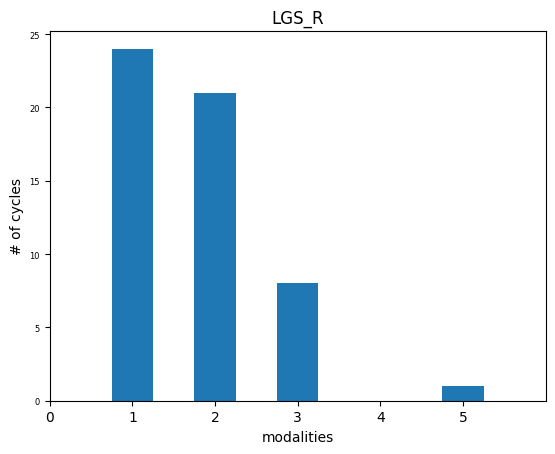

In [7]:
# Graph of the distribution over modalities of the cycles
plotting = CIMAP.targetgraph(s,Target = "LGS")
CIMAP.modality_distribution(plotting)


The method *dendroplot* shows the dendrograms built with the coloration related to the chosen cutting point.

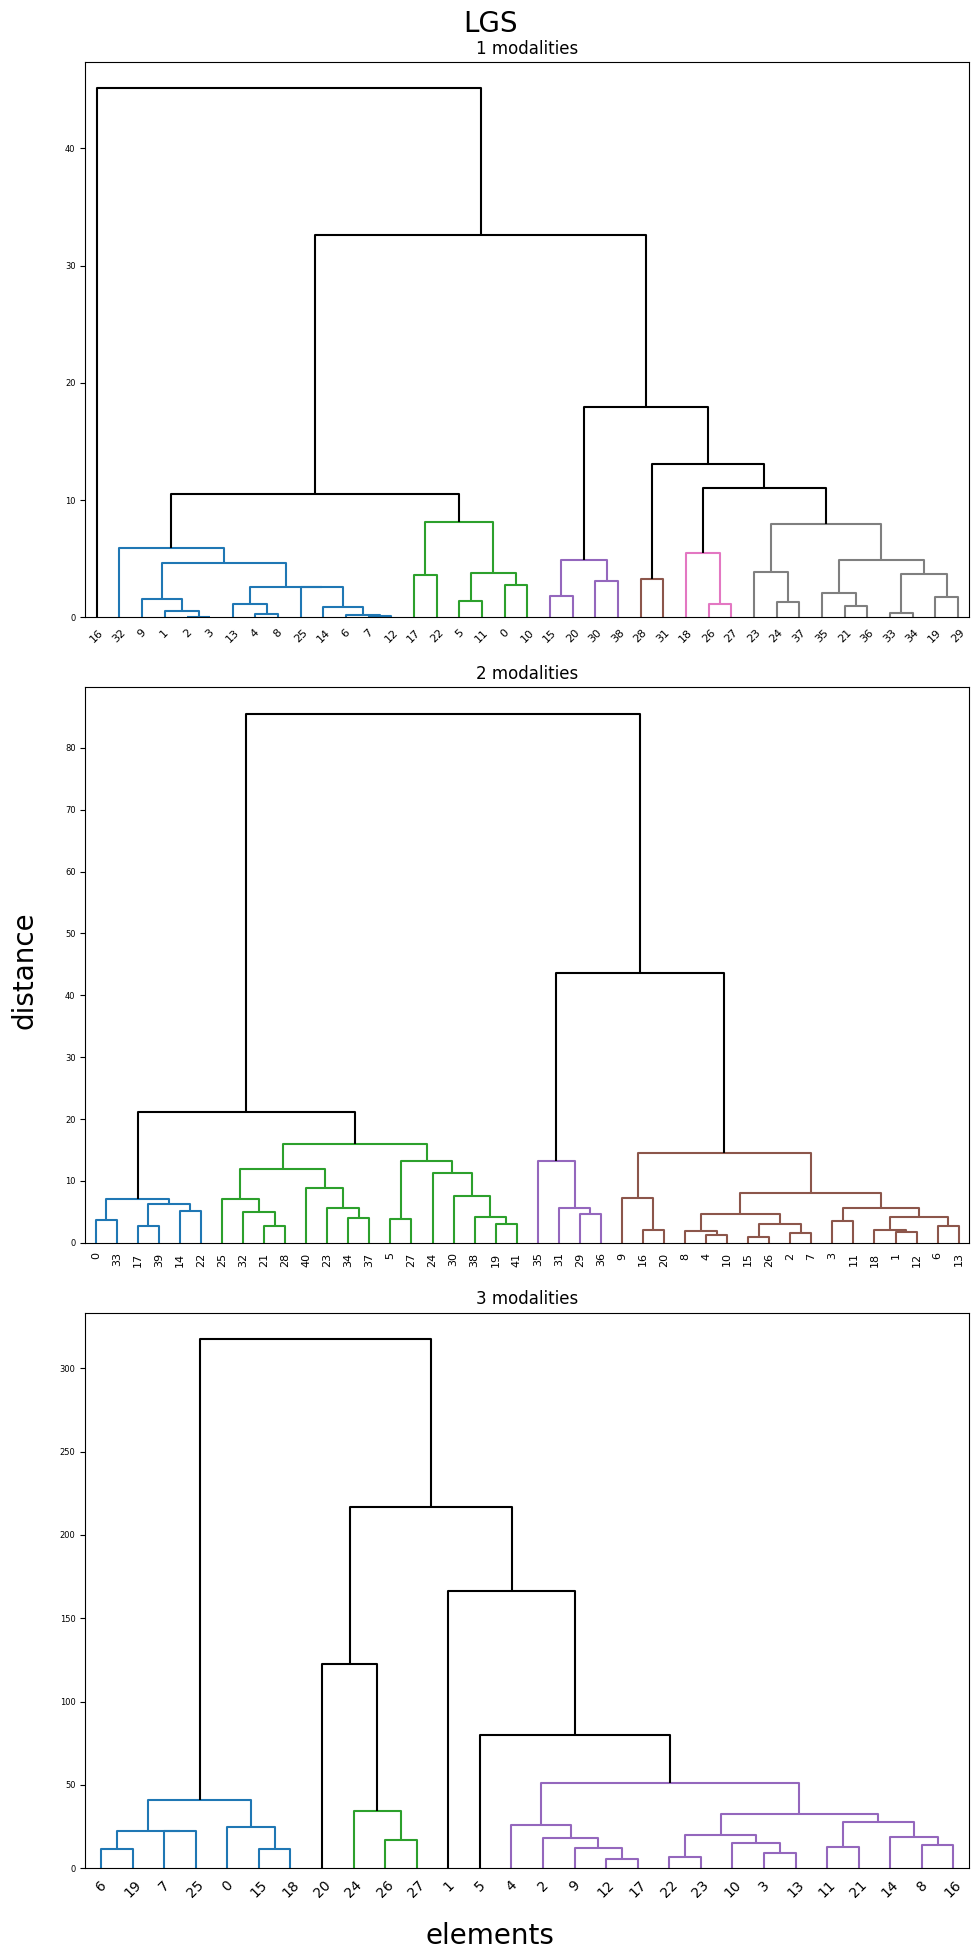

In [8]:
# Graph of the dendrograms
plotting = CIMAP.targetgraph(muscles,Target = "LGS")
CIMAP.dendroplot(plotting)


The method *clustersplot* shows the clustering results. There is the option *color = True* as optional input to the function that colours the clusters matching the colors on the dendrograms.

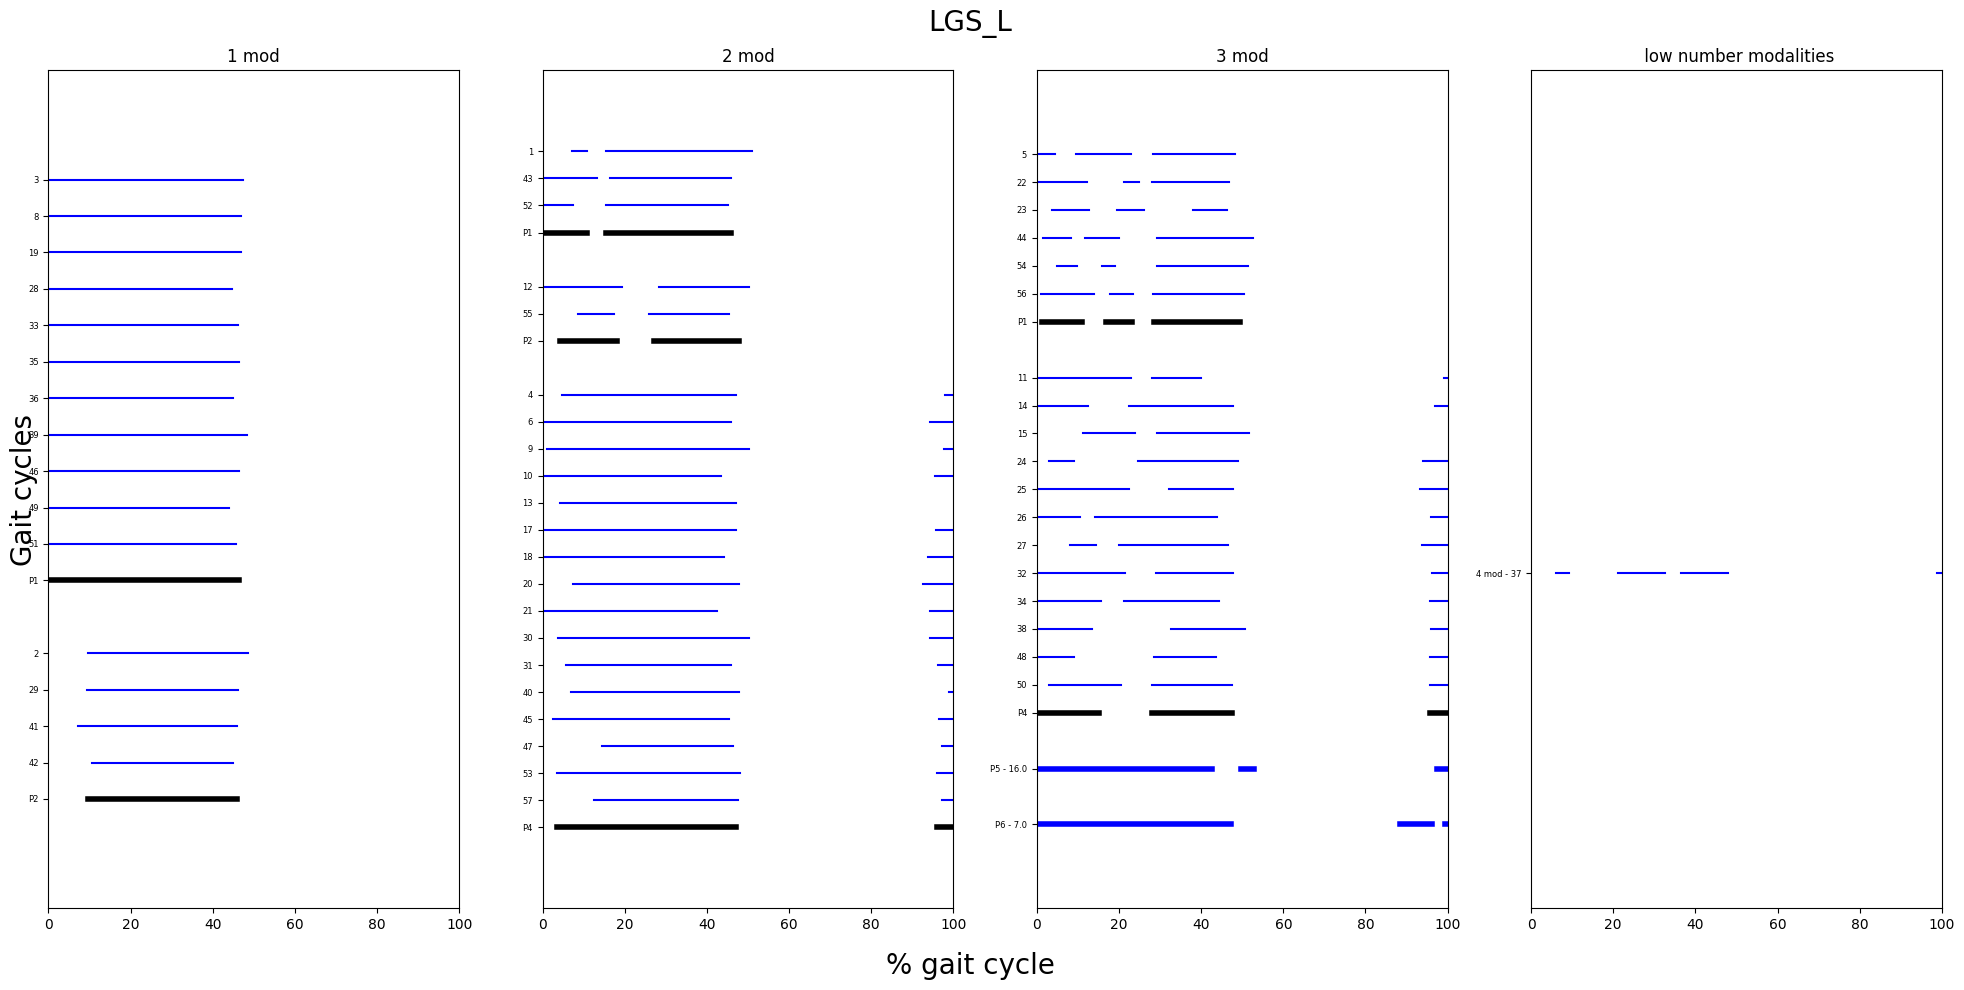

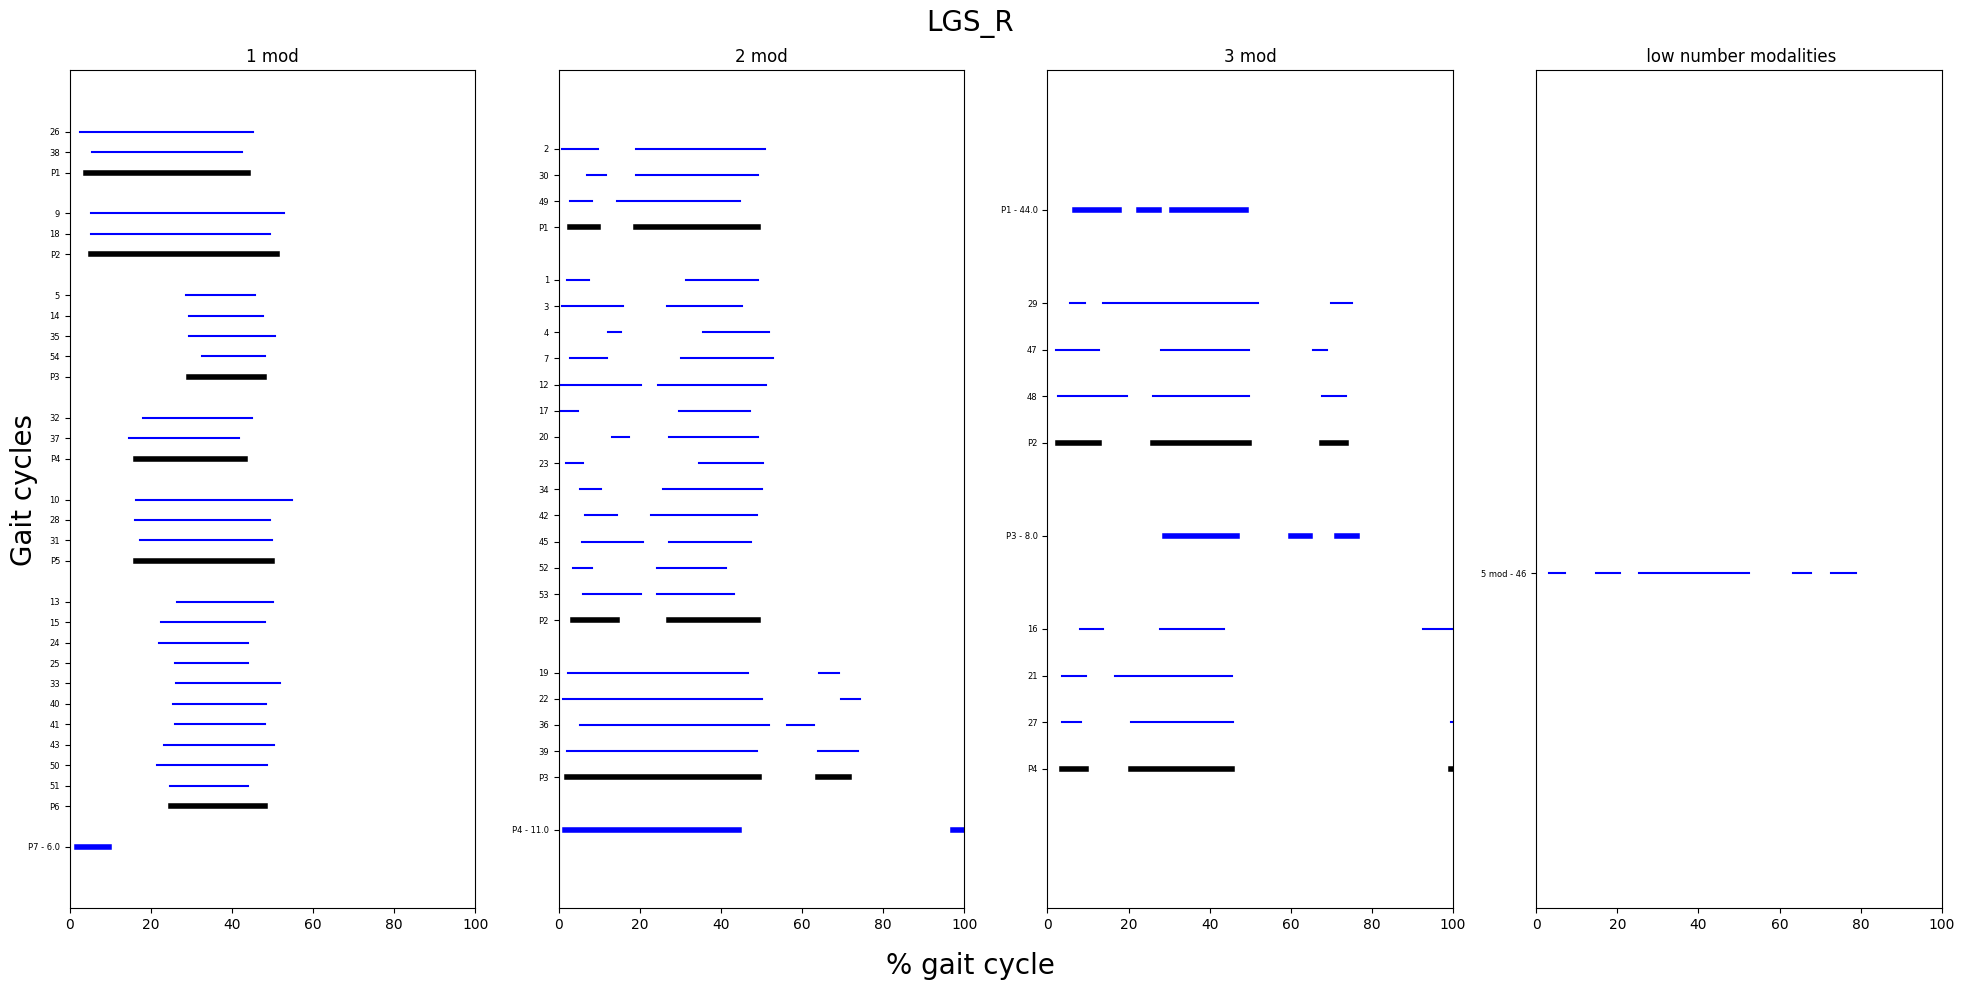

In [9]:
# Graph of the cluster over modalities

plotting = CIMAP.targetgraph(cimap_out,Target = "LGS")
CIMAP.clustersplot(plotting)


The method *PAsActivationsPlot* shows the results of the extraction of the Principal Activations. There is the option *color = True* as optional input to the function that colours the clusters matching the colors on the dendrograms.

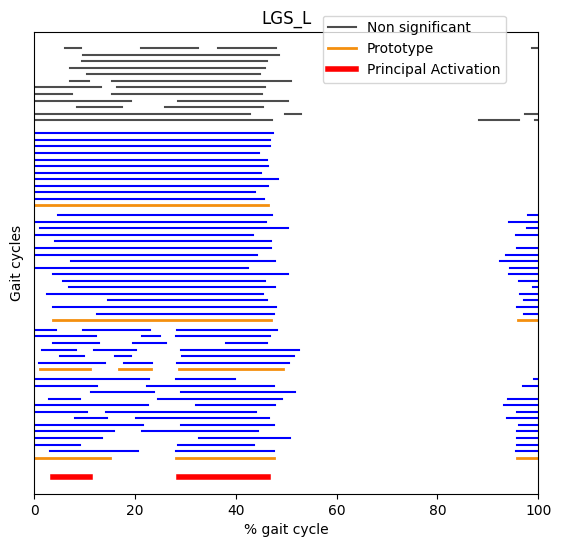

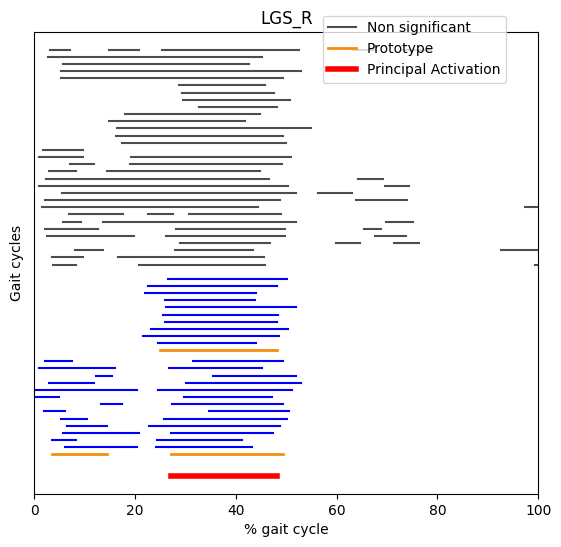

In [10]:
# Graph of the result of the Principal Activations extraction
plotting = CIMAP.targetgraph(cimap_pas,Target = "LGS")
CIMAP.PAsActivationsPlot(plotting)
